In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras.layers import Dense

In [2]:
X_train = pd.read_csv('Training_Data/Logistic_X_Train.csv')
y_train = pd.read_csv('Training_Data/Logistic_Y_Train.csv')
X_test = pd.read_csv('Test_Cases/Logistic_X_Test.csv')
submission = pd.read_csv('Test_Cases/SampleOutput.csv')

In [3]:
X_train

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236
...,...,...
2245,1.694862,0.031078
2246,-0.015928,-0.145282
2247,0.441794,-0.387912
2248,0.219570,-0.117130


In [4]:
y_train

,label
0,0
1,0
2,1
3,0
4,1
...,...
2245,1
2246,1
2247,1
2248,1


In [5]:
X_test

,f1,f2
0,-0.799827,-0.003833
1,-0.757785,1.031370
2,1.036808,-0.357004
3,0.569531,1.083775
4,0.954205,-0.598412
...,...,...
745,-0.861953,0.121555
746,2.125937,0.049084
747,0.914724,0.517849
748,-0.813262,0.651115


In [6]:
submission

,label
0,0
1,0
2,1
3,0
4,1
...,...
2245,1
2246,1
2247,1
2248,1


In [7]:
X_train.isnull().sum()

f1    0
f2    0
dtype: int64

In [8]:
X_test.isnull().sum()

f1    0
f2    0
dtype: int64

In [9]:
y_train.isnull().sum()

label    0
dtype: int64

In [10]:
submission.isnull().sum()

label    0
dtype: int64

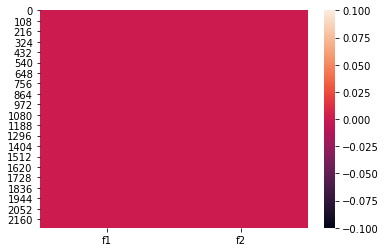

In [11]:
sns.heatmap(data=X_train.isnull())

In [12]:
X_train_val = X_train[:300]
y_train_val = y_train[:300]
X_train_new = X_train[300:]
y_train_new = y_train[300:]

In [13]:
model = models.Sequential()

In [14]:
model.add(Dense(32,activation='relu',input_shape=(2,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(X_train_new.shape,y_train_new.shape,X_train_val.shape,y_train_val.shape)

(1950, 2) (1950, 1) (300, 2) (300, 1)


In [18]:
hist = model.fit(X_train_new,y_train_new,batch_size=1,epochs=6,validation_data=(X_train_val,y_train_val))

Epoch 1/6
1950/1950 [==============================] - 3s 1ms/step - loss: 0.3410 - accuracy: 0.8574 - val_loss: 0.2557 - val_accuracy: 0.8800
Epoch 2/6
1950/1950 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.8831 - val_loss: 0.2245 - val_accuracy: 0.9033
Epoch 3/6
1950/1950 [==============================] - 3s 1ms/step - loss: 0.2577 - accuracy: 0.8933 - val_loss: 0.1966 - val_accuracy: 0.9100
Epoch 4/6
1950/1950 [==============================] - 3s 1ms/step - loss: 0.2275 - accuracy: 0.9159 - val_loss: 0.1717 - val_accuracy: 0.9433
Epoch 5/6
1950/1950 [==============================] - 3s 1ms/step - loss: 0.1996 - accuracy: 0.9287 - val_loss: 0.1495 - val_accuracy: 0.9567
Epoch 6/6
1950/1950 [==============================] - 3s 1ms/step - loss: 0.1651 - accuracy: 0.9369 - val_loss: 0.1416 - val_accuracy: 0.9633


In [19]:
h = hist.history

Text(0, 0.5, 'Loss')

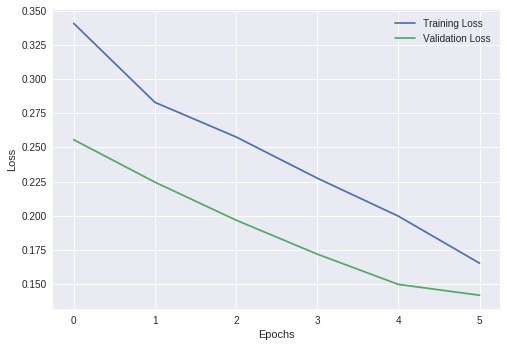

In [25]:
plt.style.use('seaborn')
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'acc')

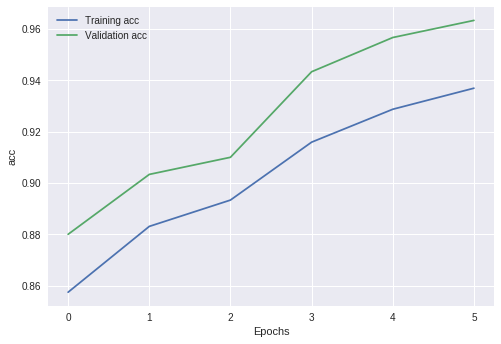

In [28]:
plt.plot(h['accuracy'],label='Training acc')
plt.plot(h['val_accuracy'],label='Validation acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('acc')

In [34]:
X_test.shape,X_train.shape,y_train.shape,submission.shape

((750, 2), (2250, 2), (2250, 1), (2250, 1))

In [54]:
y_out = model.predict(X_test)

In [55]:
y_out.shape

(750, 1)

In [56]:
submission.shape

(2250, 1)

In [57]:
y_out[y_out>=0.5] = 1

In [58]:
y_out[y_out<0.5] = 0

In [59]:
y_out = y_out.astype(dtype='int32')

In [60]:
submit = pd.DataFrame(y_out,columns=['label'])

In [62]:
submit.to_csv('my_submission.csv',index=False)